In [1]:
import pubchempy as pcp
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('/Users/neil/Desktop/NCI Cell Lines/Carboplatin_metabolic_NCI.csv')
data.head(2)

,Cell Line,Acetone ; Propanal ; acetone,Acetaldehyde oxime ; HMDB01122,acetate,Urea,Isopropyl alcohol ; Propyl alcohol,Bicarbonate ; Hydrogen carbonate,Dimethylsulfide,3-Butyn-1-al,1-pyrrolinium,...,O-b-D-glucopyranosyl-(1->3)-O-2-(acetylamino)-2-deoxy-b-D-glucopyranosyl-(1->3)-O-[6-deoxy-a-L-galactopyranosyl-(1->4)]-O-b-D-galactopyranosyl-(1->4)-O-[6-deoxy-a-L-galactopyranosyl-(1->3)]-D-Glucose,LS tetrasaccharide d ; Sialyllacto-N-neotetraose c ; Sialyllacto-N-tetraose a ; Sialyllacto-N-tetraose b ; Sialyllacto-N-tetraose c,PIP2(16:0/18:0) ; PIP2(18:0/16:0),"TG(22:5(7Z,10Z,13Z,16Z,19Z)/20:5(5Z,8Z,11Z,14Z,17Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))[iso6] ; TG(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/20:4(5Z,8Z,11Z,14Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))[iso3]","(2E)-Hexadecenoyl-CoA ; 2,7,10-hexadecatrienoylcoa ; 3,7,10-hexadecatrienoylcoa ; 3Z,7Z,10Z-hexadecatrienoyl-CoA ; 4,7,10-hexadecatrienoylcoa ; 4Z,7Z,10Z-hexadecatrienoyl-CoA ; 7,10,13-hexadecatrienoylcoa ; trans,cis,cis-2,7,10-hexadecatrienoyl-CoA",Lacto-N-difucohexaose ; Lacto-N-difucopentaose II,Galabiosylceramide (d18:1/26:1(17Z)) ; Lactosylceramide (d18:1/26:1(17Z)),cells,Cell names,Carboplatin
0,Breast_BT549,0.021811,0.006137,1.801231,0.178675,0.031762,0.143416,0.004437,0.001118,0.002353,...,0.036367,0.025836,0.075427,0.036502,0.019935,0.032820,0.039391,BT549,BR:BT-549,0.611724
1,Breast_HS578T,0.010611,0.006815,0.884542,0.093390,0.016027,0.037372,NaN,0.005778,0.003199,...,0.024981,0.013982,0.054200,0.029125,0.010750,0.015981,0.035154,HS578T,BR:HS 578T,0.705000


In [3]:
X = data.select_dtypes('float64')
X.shape

(49, 2182)

In [4]:
X.drop(columns = ['Carboplatin'], inplace=True)

In [5]:
X.shape

(49, 2181)

In [6]:
def get_smiles(metabolite_name):
    meta = [s.strip() for s in metabolite_name.split(';')]
    l, tracker, ul = [], {}, []
    for x in meta:
        try:
            result = pcp.get_properties(["IsomericSMILES"], x, "name")
            l.append(result[0]["IsomericSMILES"])
            tracker[result[0]["IsomericSMILES"]] = x
            ul.append(tracker)
        except:
            pass
    return l, ul

In [7]:
meta = list(X.columns)

In [8]:
smiles_list, tracker = [], []
for metabolite_name in meta:
    smiles, tx = get_smiles(metabolite_name)
    if smiles is not None:
        smiles_list.append(smiles)
        tracker.append(tx)

In [9]:
tracker

[[{'CC(=O)C': 'acetone', 'CCC=O': 'Propanal'},
  {'CC(=O)C': 'acetone', 'CCC=O': 'Propanal'},
  {'CC(=O)C': 'acetone', 'CCC=O': 'Propanal'}],
 [{'C/C=N/O': 'Acetaldehyde oxime'}],
 [{'CC(=O)[O-]': 'acetate'}],
 [{'C(=O)(N)N': 'Urea'}],
 [{'CC(C)O': 'Isopropyl alcohol', 'CCCO': 'Propyl alcohol'},
  {'CC(C)O': 'Isopropyl alcohol', 'CCCO': 'Propyl alcohol'}],
 [{'C(=O)(O)[O-]': 'Hydrogen carbonate'},
  {'C(=O)(O)[O-]': 'Hydrogen carbonate'}],
 [{'CSC': 'Dimethylsulfide'}],
 [{'C#CCC=O': '3-Butyn-1-al'}],
 [{'C1CC=[NH+]C1': '1-pyrrolinium'}],
 [{'C=CC(=O)N': 'Acrylamide'}],
 [{'C(C=O)C=O': 'malonic dialdehyde',
   'CC(=O)C=O': 'methylglyoxal',
   'C=CC(=O)[O-]': 'acrylate'},
  {'C(C=O)C=O': 'malonic dialdehyde',
   'CC(=O)C=O': 'methylglyoxal',
   'C=CC(=O)[O-]': 'acrylate'},
  {'C(C=O)C=O': 'malonic dialdehyde',
   'CC(=O)C=O': 'methylglyoxal',
   'C=CC(=O)[O-]': 'acrylate'},
  {'C(C=O)C=O': 'malonic dialdehyde',
   'CC(=O)C=O': 'methylglyoxal',
   'C=CC(=O)[O-]': 'acrylate'},
  {'C(C=O)C

In [10]:
len(tracker)

2181

In [11]:
len(smiles_list)

2181

In [12]:
smiles_list

[['CC(=O)C', 'CCC=O', 'CC(=O)C'],
 ['C/C=N/O'],
 ['CC(=O)[O-]'],
 ['C(=O)(N)N'],
 ['CC(C)O', 'CCCO'],
 ['C(=O)(O)[O-]', 'C(=O)(O)[O-]'],
 ['CSC'],
 ['C#CCC=O'],
 ['C1CC=[NH+]C1'],
 ['C=CC(=O)N'],
 ['C(C=O)C=O', 'CC(=O)C=O', 'C=CC(=O)[O-]', 'C(C=O)C=O', 'CC(=O)C=O'],
 ['C(CN)C=O', 'CC(=O)CN', 'CC(=O)C[NH3+]', 'C(CN)C=O'],
 ['C(=O)C(=O)[O-]'],
 ['CCC(=O)[O-]'],
 ['C(C(=O)O)N'],
 ['C(C(=O)O)O', 'C(C(=O)O)O'],
 [],
 ['C1CC(=O)NC1'],
 ['C/C=C/C(=O)O', 'CC(=O)C(=O)C', 'C1CC(=O)OC1', 'C1COCC1=O'],
 ['C=C(C(=O)O)N', 'C=C(C(=O)O)N'],
 ['C(C=O)C(=O)[O-]', 'C(C=O)C(=O)O', 'CC(=O)C(=O)O', 'CC(=O)C(=O)[O-]'],
 ['C(CN)C(=O)O',
  'C[C@H](C(=O)O)N',
  'C[C@H](C(=O)O)N',
  'C[C@@H](C(=O)O)N',
  'C[C@@H](C(=O)O)N',
  'CNCC(=O)O',
  'C(CN)C(=O)O'],
 ['C[C@H](C(=O)O)O',
  'C[C@@H](C(=O)O)O',
  'C(CO)C(=O)[O-]',
  'C([C@H](C=O)O)O',
  'C[C@H](C(=O)O)O',
  'C(C(=O)CO)O',
  'C(C(C=O)O)O',
  'C(CO)C(=O)O',
  'C[C@@H](C(=O)O)O',
  'C(C(=O)CO)O'],
 ['CC(C(C)O)O'],
 [],
 ['C(C(CO)O)O'],
 ['C1=CC=C(C=C1)N'],
 ['C

In [13]:
final_smiles = []
for i in smiles_list:
    for j in i:
        final_smiles.append(j)

In [14]:
len(final_smiles)

6563

In [15]:
from rdkit import Chem
from rdkit.Chem import AllChem
import matplotlib.pyplot as plt

In [16]:
#convert the list of smiles into rdkit molecules

mols = [Chem.MolFromSmiles(smile) for smile in final_smiles]

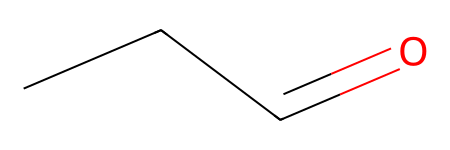

In [17]:
mols[1]

In [18]:
#generate the molecular fingerprints using Morgan Fingerprint algorithm

fps = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits = 1024) for mol in mols]

In [19]:
#convert the molecular fingerprints into a feature vector matrix

matrix = np.asarray(fps)

In [20]:
matrix.shape

(6563, 1024)

In [21]:
matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [22]:
coef_mat = np.corrcoef(matrix)

In [23]:
coef_mat

array([[1.        , 0.26694474, 1.        , ..., 0.25097566, 0.24659262,
        0.19691611],
       [0.26694474, 1.        , 0.26694474, ..., 0.19732353, 0.1936027 ,
        0.19732353],
       [1.        , 0.26694474, 1.        , ..., 0.25097566, 0.24659262,
        0.19691611],
       ...,
       [0.25097566, 0.19732353, 0.25097566, ..., 1.        , 0.72541499,
        0.49447594],
       [0.24659262, 0.1936027 , 0.24659262, ..., 0.72541499, 1.        ,
        0.48502412],
       [0.19691611, 0.19732353, 0.19691611, ..., 0.49447594, 0.48502412,
        1.        ]])

In [24]:
coef_mat[np.triu_indices_from(coef_mat, k=1)]

array([0.26694474, 1.        , 0.26694474, ..., 0.72541499, 0.49447594,
       0.48502412])

In [25]:
list_of_edges = []
for i in range(coef_mat.shape[0]):
    for j in range(i, coef_mat.shape[1]):
        corr_val = coef_mat[i][j]
        if corr_val >=0.7 and corr_val<1.0:
            temp_tup = (i,j,corr_val)
            list_of_edges.append(temp_tup)


In [26]:
list_of_edges

[(0, 4, 0.7198431614923535),
 (0, 21, 0.7367329880114089),
 (0, 30, 0.7700761726893964),
 (2, 4, 0.7198431614923535),
 (2, 21, 0.7367329880114089),
 (2, 30, 0.7700761726893964),
 (4, 24, 0.7807516018056347),
 (4, 38, 0.7807516018056347),
 (4, 470, 0.7807516018056347),
 (6, 56, 0.7700761726893964),
 (24, 557, 0.78705757121112),
 (25, 166, 0.7081531298575253),
 (25, 167, 0.7081531298575253),
 (29, 100, 0.7369550533889849),
 (29, 101, 0.7369550533889849),
 (30, 37, 0.7540692498886469),
 (30, 38, 0.7149016733615978),
 (30, 469, 0.7540692498886469),
 (30, 470, 0.7149016733615978),
 (30, 471, 0.7540692498886469),
 (30, 472, 0.7540692498886469),
 (33, 473, 0.7006524428956522),
 (33, 474, 0.7006524428956522),
 (34, 473, 0.7006524428956522),
 (34, 474, 0.7006524428956522),
 (39, 65, 0.784819745147495),
 (39, 69, 0.784819745147495),
 (39, 108, 0.7593823847938513),
 (39, 118, 0.7369550533889849),
 (39, 178, 0.7362081523234104),
 (40, 110, 0.742037560191391),
 (40, 111, 0.742037560191391),
 (40, 1

In [27]:
import networkx as nx

In [28]:
G = nx.Graph()

In [29]:
G.add_weighted_edges_from(list_of_edges)

In [30]:
G.edges[0, 4]

{'weight': 0.7198431614923535}

In [31]:
my_comms = nx.community.louvain_communities(G, seed=123)

In [32]:
my_comms

[{6, 56},
 {29, 100, 101},
 {33, 34, 473, 474},
 {40, 41, 42, 43, 110, 111, 121, 123, 125, 180, 181, 184},
 {46, 47, 50, 54, 115, 116, 157},
 {61, 62, 64, 66, 193},
 {94, 95, 96, 97, 145, 146, 147, 148, 432, 655},
 {98, 144, 753},
 {105, 106, 120},
 {114, 119, 276},
 {138, 140, 141},
 {158, 690, 691},
 {160, 694, 726},
 {175, 176, 257},
 {198, 199},
 {202, 208, 209, 210},
 {213, 216, 267, 354},
 {222, 281},
 {205, 223, 224, 230, 231, 232, 288},
 {235, 368},
 {270, 478, 479, 642, 643, 644},
 {271, 272, 356},
 {279, 280, 650},
 {282, 283},
 {291, 504, 572},
 {312, 314, 391, 675},
 {315, 393, 414},
 {321, 322},
 {237, 326, 571, 658},
 {361, 460},
 {363},
 {365, 366},
 {367},
 {374, 375},
 {381, 510},
 {390, 394, 513},
 {82, 401, 561, 563, 577, 640},
 {311, 384, 385, 406, 415, 416, 511},
 {410,
  412,
  514,
  518,
  591,
  656,
  659,
  660,
  668,
  744,
  745,
  755,
  757,
  758,
  759,
  760,
  762,
  890,
  891,
  893,
  897,
  901,
  902,
  910,
  973,
  1033,
  1034,
  1638},
 {411

In [33]:
len(mols)

6563

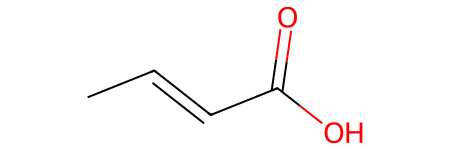

In [34]:
mols[29]

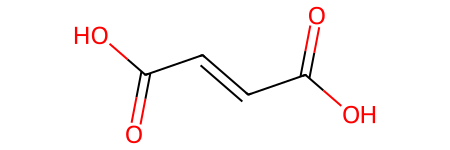

In [35]:
mols[100]

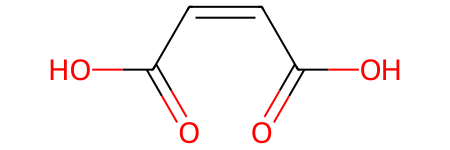

In [36]:
mols[101]

In [37]:
for i,s in enumerate(my_comms):
    print(i, ' ', len(s))

0   2
1   3
2   4
3   12
4   7
5   5
6   10
7   3
8   3
9   3
10   3
11   3
12   3
13   3
14   2
15   4
16   4
17   2
18   7
19   2
20   6
21   3
22   3
23   2
24   3
25   4
26   3
27   2
28   4
29   2
30   1
31   2
32   1
33   2
34   2
35   3
36   6
37   7
38   28
39   2
40   583
41   3
42   2
43   3
44   2
45   2
46   2
47   5
48   2
49   148
50   11
51   3
52   6
53   2
54   2
55   1
56   5
57   2
58   2
59   4
60   44
61   4
62   10
63   1
64   19
65   1
66   10
67   8
68   4
69   3
70   1
71   2
72   1107
73   3
74   6
75   6
76   1
77   2
78   23
79   13
80   2
81   1
82   2
83   24
84   4
85   1
86   1
87   5
88   12
89   2
90   2
91   1
92   1
93   1
94   1
95   2
96   2
97   13
98   332
99   3
100   1
101   1
102   1
103   1
104   1
105   1
106   4
107   2
108   1
109   1
110   1
111   1565
112   1
113   5
114   1
115   1
116   1
117   1
118   1
119   3
120   4
121   1
122   1
123   1
124   1
125   2
126   2
127   1
128   1
129   1
130   4
131   1
132   5
133   1
134   1
135  

In [38]:
len(my_comms)

192

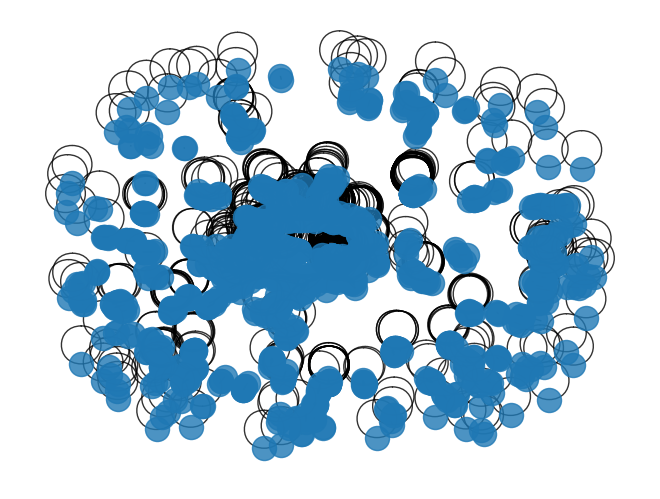

In [39]:
#pos = nx.spring_layout(G, seed = 42)
nx.draw(G, alpha = 0.8)
plt.show()

In [40]:
print('Number of nodes', len(G.nodes))
print('Number of edges', len(G.edges))
print('Average degree', sum(dict(G.degree).values()) / len(G.nodes))

Number of nodes 6164
Number of edges 4958395
Average degree 1608.8238157040882


In [41]:
import community

In [42]:
partition = community.best_partition(G)

In [43]:
len(partition)

6164

In [44]:
partition

{0: 1,
 4: 1,
 21: 1,
 30: 1,
 2: 1,
 24: 1,
 38: 1,
 470: 1,
 6: 2,
 56: 2,
 557: 1,
 25: 1,
 166: 1,
 167: 1,
 29: 3,
 100: 3,
 101: 3,
 37: 1,
 469: 1,
 471: 1,
 472: 1,
 33: 4,
 473: 4,
 474: 4,
 34: 4,
 39: 1,
 65: 1,
 69: 1,
 108: 1,
 118: 1,
 178: 1,
 40: 5,
 110: 5,
 111: 5,
 121: 5,
 123: 5,
 125: 5,
 41: 5,
 42: 5,
 43: 5,
 45: 1,
 46: 6,
 115: 6,
 116: 6,
 47: 6,
 48: 1,
 117: 1,
 50: 6,
 53: 1,
 671: 1,
 954: 1,
 962: 1,
 54: 6,
 60: 1,
 73: 1,
 74: 1,
 75: 1,
 76: 1,
 182: 1,
 183: 1,
 185: 1,
 61: 8,
 193: 8,
 62: 8,
 64: 8,
 165: 1,
 168: 1,
 192: 1,
 345: 1,
 346: 1,
 607: 1,
 608: 1,
 704: 1,
 705: 1,
 706: 1,
 707: 1,
 878: 1,
 1212: 1,
 1648: 1,
 66: 8,
 67: 1,
 70: 1,
 122: 1,
 124: 1,
 126: 1,
 127: 1,
 128: 1,
 212: 1,
 215: 1,
 373: 1,
 387: 1,
 538: 1,
 800: 1,
 801: 1,
 82: 9,
 401: 9,
 94: 10,
 145: 10,
 146: 10,
 147: 10,
 148: 10,
 432: 10,
 655: 10,
 95: 10,
 96: 10,
 97: 10,
 98: 11,
 144: 11,
 104: 1,
 173: 1,
 337: 1,
 338: 1,
 105: 12,
 120: 12,
 106: 1

In [45]:
max(partition.values())


190

In [46]:
min(partition.values())

0

In [47]:
centrality_scores = nx.degree_centrality(G)  # Example: using degree centrality

# Step 3: Rank nodes within each community based on centrality scores
community_representatives = {}
for node, community_id in partition.items():
    if community_id not in community_representatives:
        community_representatives[community_id] = []
    community_representatives[community_id].append((node, centrality_scores[node]))

# Step 4: Select representative samples from each community
num_representatives = 1  # Number of representatives to select from each community
representative_samples = []
for community_id, nodes in community_representatives.items():
    nodes.sort(key=lambda x: x[1], reverse=True)  # Sort nodes based on centrality scores
    representatives = [node[0] for node in nodes[:num_representatives]]
    representative_samples.extend(representatives)

In [48]:
print("Representative samples:")
for sample in representative_samples:
    print(sample)

Representative samples:
847
6
29
33
110
115
193
563
94
144
120
276
138
691
726
257
198
202
224
267
222
731
235
658
478
356
650
282
291
511
314
315
2340
321
622
361
363
365
367
374
407
381
390
891
411
615
4020
444
627
461
551
467
475
1461
477
594
550
562
564
1632
568
1143
613
2147
631
979
641
654
984
684
2192
1260
721
723
793
4927
783
806
787
3242
809
974
1203
2377
846
1000
864
867
3654
2477
888
922
2232
929
1983
3115
935
941
946
1834
953
956
960
968
976
987
1082
2309
1014
1121
1029
1050
1051
1065
1068
2048
1090
1104
1117
1123
1144
1389
1175
1177
1181
1182
1183
1988
1192
1195
1205
2020
1287
1290
1304
1312
1327
1329
1359
1372
1430
6521
1435
1469
1472
1475
1486
1487
1570
1670
1668
1685
1695
1860
1708
1735
2003
1891
1893
1915
1944
1950
1966
2074
2022
2028
2043
2216
3564
2091
2487
2116
2125
2151
3915
2252
2286
2463
2306
2372
2434
2557
2569
5626
2592
2623
5547
3173
3381
5708
5845


In [49]:
#extracting smiles from the representative samples

rep_smiles = [final_smiles[i] for i in representative_samples]


In [50]:
rep_smiles

['CCCCC/C=C/C/C=C/CCCCCC(=O)O',
 'CC(C)O',
 'C/C=C/C(=O)O',
 'C=C(C(=O)O)N',
 'CC(C)[C@@H](C(=O)O)N',
 'CC(C(=O)O)C(=O)O',
 'CC(CC(=O)O)C(=O)O',
 'C1=CC=C(C=C1)CC(=O)NCC(=O)O',
 'C1C[C@@H](NC1)C(=O)O',
 'CC(=O)NCCCC=O',
 'C(C(=O)O)(C(=O)O)N',
 'C1[C@H]([C@@H]([C@H](C(=O)O1)O)O)O',
 'C1CC(=O)NC1C(=O)[O-]',
 'CC[C@H](C)C(=O)C(=O)[O-]',
 'CC(CC(=O)C(=O)O)O',
 'CN(CC(=O)O)C(=O)CN',
 'C(CNC(=O)N)C(=O)[O-]',
 'CC(C)C[C@H](C(=O)[O-])O',
 'CCC(C(C(=O)O)O)O',
 'C(CC(=O)[O-])[C@@H](C(=O)[O-])[NH3+]',
 'CC(C)([C@H](C(=O)O)O)O',
 'C1=CC(=C(C=C1O)C(=O)CC(C(=O)O)N)N',
 'C1=CC(=CN=C1)CC(=O)O',
 'C1=CC(=CC(=C1)Cl)C(=O)NCC(=O)O',
 'C(=O)(C(=O)O)O',
 'CSCCC(=O)/C(=C/O)/O',
 'C1=CC=C(C=C1)/C=C/C(=O)C2=CC=CC=C2',
 'C[C@@](CCO)(CC(=O)[O-])O',
 'C1=CC=C(C=C1)C(C(=O)O)N',
 'CNC[C@@H](C1=CC(=C(C=C1)O)O)O',
 'C1=CC(=C(C=C1O)C(=O)O)O',
 'C1=CC(=C(C=C1C(=O)O)O)O',
 'CC(=CCC/C(=C/CC/C(=C/CC/C(=C/C=C/C=C(/CC/C=C(/CC/C=C(/CCC=C(C)C)\\C)\\C)\\C)/C)/C)/C)C',
 'C1=CC(=C(C=C1[N+](=O)[O-])O)[O-]',
 'C1=CC2=C(C(=C1)O)NC(

In [51]:
len(rep_smiles)

191

In [52]:
#converting the representative smiles back into metabolite names using rdkit

meta_names = []
for smile in rep_smiles:
    molecule = Chem.MolFromSmiles(smile)
    if molecule is not None:
        name = Chem.MolToSmiles(molecule)
        meta_names.append(name)
    else:
        print(f'Invalid {smile}')

In [53]:
rep_smiles

['CCCCC/C=C/C/C=C/CCCCCC(=O)O',
 'CC(C)O',
 'C/C=C/C(=O)O',
 'C=C(C(=O)O)N',
 'CC(C)[C@@H](C(=O)O)N',
 'CC(C(=O)O)C(=O)O',
 'CC(CC(=O)O)C(=O)O',
 'C1=CC=C(C=C1)CC(=O)NCC(=O)O',
 'C1C[C@@H](NC1)C(=O)O',
 'CC(=O)NCCCC=O',
 'C(C(=O)O)(C(=O)O)N',
 'C1[C@H]([C@@H]([C@H](C(=O)O1)O)O)O',
 'C1CC(=O)NC1C(=O)[O-]',
 'CC[C@H](C)C(=O)C(=O)[O-]',
 'CC(CC(=O)C(=O)O)O',
 'CN(CC(=O)O)C(=O)CN',
 'C(CNC(=O)N)C(=O)[O-]',
 'CC(C)C[C@H](C(=O)[O-])O',
 'CCC(C(C(=O)O)O)O',
 'C(CC(=O)[O-])[C@@H](C(=O)[O-])[NH3+]',
 'CC(C)([C@H](C(=O)O)O)O',
 'C1=CC(=C(C=C1O)C(=O)CC(C(=O)O)N)N',
 'C1=CC(=CN=C1)CC(=O)O',
 'C1=CC(=CC(=C1)Cl)C(=O)NCC(=O)O',
 'C(=O)(C(=O)O)O',
 'CSCCC(=O)/C(=C/O)/O',
 'C1=CC=C(C=C1)/C=C/C(=O)C2=CC=CC=C2',
 'C[C@@](CCO)(CC(=O)[O-])O',
 'C1=CC=C(C=C1)C(C(=O)O)N',
 'CNC[C@@H](C1=CC(=C(C=C1)O)O)O',
 'C1=CC(=C(C=C1O)C(=O)O)O',
 'C1=CC(=C(C=C1C(=O)O)O)O',
 'CC(=CCC/C(=C/CC/C(=C/CC/C(=C/C=C/C=C(/CC/C=C(/CC/C=C(/CCC=C(C)C)\\C)\\C)\\C)/C)/C)/C)C',
 'C1=CC(=C(C=C1[N+](=O)[O-])O)[O-]',
 'C1=CC2=C(C(=C1)O)NC(

In [54]:
x = [{'smile': 'metabolite', 'smileA': 'metaboliteA'}, {'smile2': 'metabolite2'}, {'smile3': 'metabolite3'}]

rep_meta = []
for i in x:
    for j in i.keys():
        rep_meta.append(i[j])



In [55]:
rep_meta

['metabolite', 'metaboliteA', 'metabolite2', 'metabolite3']

In [56]:
tr = []
for i in tracker:
    if len(i) == 1:
        for x in i:
            if x not in tr:
                tr.append(x)
    else:
        for j in i:
            if j not in tr:
                tr.append(j)

In [57]:
tr

[{'CC(=O)C': 'acetone', 'CCC=O': 'Propanal'},
 {'C/C=N/O': 'Acetaldehyde oxime'},
 {'CC(=O)[O-]': 'acetate'},
 {'C(=O)(N)N': 'Urea'},
 {'CC(C)O': 'Isopropyl alcohol', 'CCCO': 'Propyl alcohol'},
 {'C(=O)(O)[O-]': 'Hydrogen carbonate'},
 {'CSC': 'Dimethylsulfide'},
 {'C#CCC=O': '3-Butyn-1-al'},
 {'C1CC=[NH+]C1': '1-pyrrolinium'},
 {'C=CC(=O)N': 'Acrylamide'},
 {'C(C=O)C=O': 'malonic dialdehyde',
  'CC(=O)C=O': 'methylglyoxal',
  'C=CC(=O)[O-]': 'acrylate'},
 {'C(CN)C=O': 'beta-Aminopropion aldehyde',
  'CC(=O)CN': 'Aminoacetone',
  'CC(=O)C[NH3+]': 'ammonioacetone'},
 {'C(=O)C(=O)[O-]': 'glyoxylate'},
 {'CCC(=O)[O-]': 'propionate'},
 {'C(C(=O)O)N': 'Glycine'},
 {'C(C(=O)O)O': 'glycolate'},
 {'C1CC(=O)NC1': '2-Pyrrolidinone'},
 {'C/C=C/C(=O)O': 'But-2-enoic acid',
  'CC(=O)C(=O)C': 'Diacetyl',
  'C1CC(=O)OC1': 'Gamma-Butyrolactone',
  'C1COCC1=O': 'Oxolan-3-one'},
 {'C=C(C(=O)O)N': '2-aminoacrylic acid'},
 {'C(C=O)C(=O)[O-]': '3-oxopropanoate',
  'C(C=O)C(=O)O': 'Malonic semialdehyde',
  

In [58]:
len(tr)

1993

In [59]:
rep_smiles

['CCCCC/C=C/C/C=C/CCCCCC(=O)O',
 'CC(C)O',
 'C/C=C/C(=O)O',
 'C=C(C(=O)O)N',
 'CC(C)[C@@H](C(=O)O)N',
 'CC(C(=O)O)C(=O)O',
 'CC(CC(=O)O)C(=O)O',
 'C1=CC=C(C=C1)CC(=O)NCC(=O)O',
 'C1C[C@@H](NC1)C(=O)O',
 'CC(=O)NCCCC=O',
 'C(C(=O)O)(C(=O)O)N',
 'C1[C@H]([C@@H]([C@H](C(=O)O1)O)O)O',
 'C1CC(=O)NC1C(=O)[O-]',
 'CC[C@H](C)C(=O)C(=O)[O-]',
 'CC(CC(=O)C(=O)O)O',
 'CN(CC(=O)O)C(=O)CN',
 'C(CNC(=O)N)C(=O)[O-]',
 'CC(C)C[C@H](C(=O)[O-])O',
 'CCC(C(C(=O)O)O)O',
 'C(CC(=O)[O-])[C@@H](C(=O)[O-])[NH3+]',
 'CC(C)([C@H](C(=O)O)O)O',
 'C1=CC(=C(C=C1O)C(=O)CC(C(=O)O)N)N',
 'C1=CC(=CN=C1)CC(=O)O',
 'C1=CC(=CC(=C1)Cl)C(=O)NCC(=O)O',
 'C(=O)(C(=O)O)O',
 'CSCCC(=O)/C(=C/O)/O',
 'C1=CC=C(C=C1)/C=C/C(=O)C2=CC=CC=C2',
 'C[C@@](CCO)(CC(=O)[O-])O',
 'C1=CC=C(C=C1)C(C(=O)O)N',
 'CNC[C@@H](C1=CC(=C(C=C1)O)O)O',
 'C1=CC(=C(C=C1O)C(=O)O)O',
 'C1=CC(=C(C=C1C(=O)O)O)O',
 'CC(=CCC/C(=C/CC/C(=C/CC/C(=C/C=C/C=C(/CC/C=C(/CC/C=C(/CCC=C(C)C)\\C)\\C)\\C)/C)/C)/C)C',
 'C1=CC(=C(C=C1[N+](=O)[O-])O)[O-]',
 'C1=CC2=C(C(=C1)O)NC(

In [60]:
len(rep_smiles)

191

In [61]:
tr

[{'CC(=O)C': 'acetone', 'CCC=O': 'Propanal'},
 {'C/C=N/O': 'Acetaldehyde oxime'},
 {'CC(=O)[O-]': 'acetate'},
 {'C(=O)(N)N': 'Urea'},
 {'CC(C)O': 'Isopropyl alcohol', 'CCCO': 'Propyl alcohol'},
 {'C(=O)(O)[O-]': 'Hydrogen carbonate'},
 {'CSC': 'Dimethylsulfide'},
 {'C#CCC=O': '3-Butyn-1-al'},
 {'C1CC=[NH+]C1': '1-pyrrolinium'},
 {'C=CC(=O)N': 'Acrylamide'},
 {'C(C=O)C=O': 'malonic dialdehyde',
  'CC(=O)C=O': 'methylglyoxal',
  'C=CC(=O)[O-]': 'acrylate'},
 {'C(CN)C=O': 'beta-Aminopropion aldehyde',
  'CC(=O)CN': 'Aminoacetone',
  'CC(=O)C[NH3+]': 'ammonioacetone'},
 {'C(=O)C(=O)[O-]': 'glyoxylate'},
 {'CCC(=O)[O-]': 'propionate'},
 {'C(C(=O)O)N': 'Glycine'},
 {'C(C(=O)O)O': 'glycolate'},
 {'C1CC(=O)NC1': '2-Pyrrolidinone'},
 {'C/C=C/C(=O)O': 'But-2-enoic acid',
  'CC(=O)C(=O)C': 'Diacetyl',
  'C1CC(=O)OC1': 'Gamma-Butyrolactone',
  'C1COCC1=O': 'Oxolan-3-one'},
 {'C=C(C(=O)O)N': '2-aminoacrylic acid'},
 {'C(C=O)C(=O)[O-]': '3-oxopropanoate',
  'C(C=O)C(=O)O': 'Malonic semialdehyde',
  

In [63]:
rep_met = []
for i in rep_smiles:
    for j in tr:
        for x in j.keys():
            if i == x:
                rep_met.append(j[x])


In [64]:
len(rep_met)

192

In [65]:
rep_met

['7,10-Hexadecadienoic acid',
 'Isopropyl alcohol',
 'But-2-enoic acid',
 '2-aminoacrylic acid',
 'L-valine',
 'Methylmalonic acid',
 'Methylsuccinic acid',
 'Phenylacetylglycine',
 'D-proline',
 '4-acetamidobutanal',
 'Aminomalonic acid',
 'D-Xylono-1,5-lactone',
 '5-oxoprolinate',
 '(3S)-3-Methyl-2-oxopentanoate',
 '4-Hydroxy-2-oxovalerate',
 'Glycylsarcosine',
 'N-carbamoyl-beta-alaninate',
 '(R)-2-hydroxy-4-methylpentanoate',
 '2,3-Dihydroxyvaleric acid',
 'L-glutamate(1-)',
 '(R)-2,3-Dihydroxy-isovalerate',
 '5-hydroxykynurenine',
 '3-Pyridylacetic acid',
 'm-Chlorohippuric acid',
 'Ethanedioic acid',
 '1,2-Dihydroxy-3-keto-5-methylthiopentene',
 'Chalcone',
 '(R)-mevalonate',
 '2-Phenylglycine',
 'Epinephrine',
 'Gentisic acid',
 'Protocatechuic acid',
 'Phytoene',
 '2-hydroxy-4-nitrophenolate',
 'oxoxanthurenate',
 '3-Methylsulfinylpropyl isothiocyanate',
 '4-(3-Pyridyl)-3-butenoic acid',
 '1-Methylguanine',
 '7-Methylguanine',
 'Quinolinic acid',
 'Pyridoxine',
 'N-Trimethyl-2-

In [74]:
unique_reps = []
for i in meta:
    for j in rep_met:
        if j in i:
            unique_reps.append(i)

In [80]:
final_reps = []
for i in unique_reps:
    if i not in final_reps:
        final_reps.append(i)

In [81]:
len(final_reps)

197

In [82]:
final_reps

['Isopropyl alcohol ; Propyl alcohol',
 'But-2-enoic acid ; Diacetyl ; Gamma-Butyrolactone ; Oxolan-3-one',
 '2-Aminoacrylic acid ; 2-aminoacrylic acid',
 'D-Proline ; D-proline ; L-Proline ; L-proline ; acetamidopropanal',
 '5-Aminopentanoic acid ; Betaine ; HMDB02141 ; L-Valine ; L-valine ; Vaporole ; glycine betaine',
 'Erythrono-1,4-lactone ; Methylmalonate ; Methylmalonic acid ; Succinate ; Succinic acid ; Threonolactone',
 'Aminomalonic acid',
 '1-Pyrroline-4-hydroxy-2-carboxylate ; 5-oxoprolinate ; HMDB01843 ; L-1-Pyrroline-3-hydroxy-5-carboxylate ; Pyroglutamic acid ; Pyrrolidonecarboxylic acid ; Pyrroline hydroxycarboxylic acid',
 '4-acetamidobutanal ; D-Pipecolic acid ; HMDB04226 ; L-Pipecolic acid ; L-pipecolic acid ; Pipecolic acid',
 '(S)-2-Acetolactate ; 2-Acetolactate ; Dimethylmalonic acid ; Ethylmalonic acid ; Glutaric acid ; Methylsuccinic acid ; Monoethyl malonic acid',
 'Glycyl-glycine ; HMDB12265 ; L-Asparagine ; L-asparagine ; N-carbamoyl-beta-alaninate ; Ureidopr

In [83]:
with open('representative_metabolites.txt', '+a') as f:
    for i in final_reps:
        f.write(f'{i}\n')